# Anas Masroor

* Chinhook Data
* SQL
* Story Telling

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3 as sql

In [2]:
db = "Chinook.db"
conn = sql.connect(db)

In [3]:
def read_query(q):
    return pd.read_sql_query(q, conn)

In [4]:
q = """select * from sqlite_master where type = "table" """

read_query(q)

,type,name,tbl_name,rootpage,sql
0,table,album,album,2,CREATE TABLE [album]\n(\n [album_id] INTEGE...
1,table,artist,artist,3,CREATE TABLE [artist]\n(\n [artist_id] INTE...
2,table,customer,customer,4,CREATE TABLE [customer]\n(\n [customer_id] ...
3,table,employee,employee,5,CREATE TABLE [employee]\n(\n [employee_id] ...
4,table,genre,genre,6,CREATE TABLE [genre]\n(\n [genre_id] INTEGE...
5,table,invoice,invoice,7,CREATE TABLE [invoice]\n(\n [invoice_id] IN...
6,table,invoice_line,invoice_line,8,CREATE TABLE [invoice_line]\n(\n [invoice_l...
7,table,media_type,media_type,9,CREATE TABLE [media_type]\n(\n [media_type_...
8,table,playlist,playlist,10,CREATE TABLE [playlist]\n(\n [playlist_id] ...
9,table,playlist_track,playlist_track,11,CREATE TABLE [playlist_track]\n(\n [playlis...


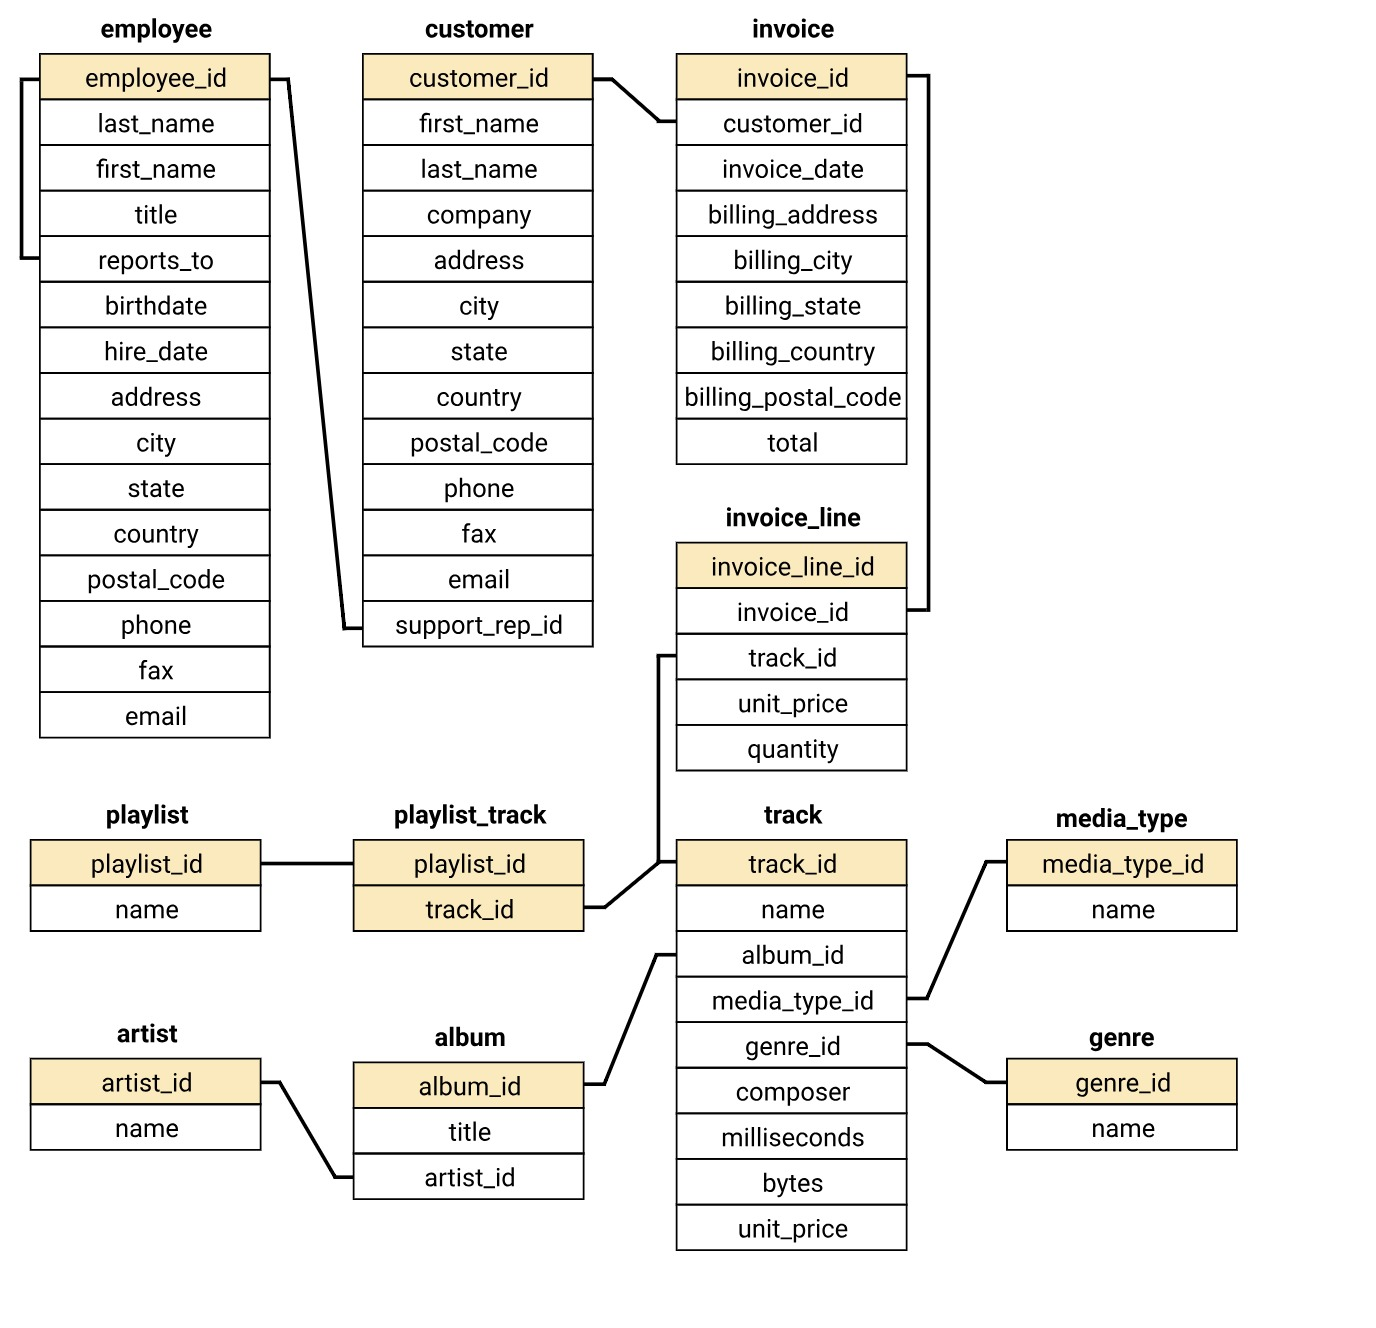

In [5]:
q = """Select * from invoice where invoice_id = 1"""

read_query(q)

,invoice_id,customer_id,invoice_date,billing_address,billing_city,billing_state,billing_country,billing_postal_code,total,tax,subtotal
0,1,18,2017-01-03 00:00:00,627 Broadway,New York,NY,USA,10012-2612,15.84,0,15.84


In [6]:
q = """Select * from invoice_line limit 5"""

read_query(q)

,invoice_line_id,invoice_id,track_id,unit_price,quantity
0,1,1,1158,0.99,1
1,2,1,1159,0.99,1
2,3,1,1160,0.99,1
3,4,1,1161,0.99,1
4,5,1,1162,0.99,1


In [7]:
q = """Select * from invoice_line 
        where track_id == 1158"""

read_query(q)

,invoice_line_id,invoice_id,track_id,unit_price,quantity
0,1,1,1158,0.99,1
1,3742,482,1158,0.99,1


Invoice_ID, Track_ID, Track_Name, Track_type, Quantity, Unit_price

In [8]:
q = """Select il.invoice_id, t.track_id Track_ID, t.name Track_Name,
        m.name Track_Type, il.quantity Quantity, il.unit_price Unit_Price 
        from invoice_line il
        inner join track t
        on
        t.track_id = il.track_id
        inner join media_type m
        on
        m.media_type_id = t.media_type_id
        where il.invoice_id = 1
        """

read_query(q)

,invoice_id,Track_ID,Track_Name,Track_Type,Quantity,Unit_Price
0,1,1158,Right Next Door to Hell,Protected AAC audio file,1,0.99
1,1,1159,Dust N' Bones,Protected AAC audio file,1,0.99
2,1,1160,Live and Let Die,Protected AAC audio file,1,0.99
3,1,1161,Don't Cry (Original),Protected AAC audio file,1,0.99
4,1,1162,Perfect Crime,Protected AAC audio file,1,0.99
5,1,1163,You Ain't the First,Protected AAC audio file,1,0.99
6,1,1164,Bad Obsession,Protected AAC audio file,1,0.99
7,1,1165,Back off Bitch,Protected AAC audio file,1,0.99
8,1,1166,Double Talkin' Jive,Protected AAC audio file,1,0.99
9,1,1167,November Rain,Protected AAC audio file,1,0.99


In [9]:
q = """Select c.first_name || " " ||c.last_name Customer_Name,
        count(inv.invoice_id) no_of_visits,
        sum(inv.total) Total_spend,
        case
            when sum(inv.total) < 40 then "Small Spender"
            when sum(inv.total) > 100 then "Big Spender"
            Else "Regular"
        end Customer_category
        from customer c
        left join invoice inv
        on
        c.customer_id = inv.customer_id
        group by c.customer_id

        """

read_query(q)

,Customer_Name,no_of_visits,Total_spend,Customer_category
0,Luís Gonçalves,13,108.90,Big Spender
1,Leonie Köhler,11,82.17,Regular
2,François Tremblay,9,99.99,Regular
3,Bjørn Hansen,9,72.27,Regular
4,František Wichterlová,18,144.54,Big Spender
5,Helena Holý,12,128.70,Big Spender
6,Astrid Gruber,9,69.30,Regular
7,Daan Peeters,7,60.39,Regular
8,Kara Nielsen,10,37.62,Small Spender
9,Eduardo Martins,12,60.39,Regular


In [10]:
q = """Select  alb.title Album_Title, ar.name Artist_Name, 
        sum(il.quantity) No_Sold
        from invoice_line il
        inner join track t
        on
        t.track_id = il.track_id
        inner join album alb
        on
        alb.album_id = t.album_id
        inner join artist ar
        on
        ar.artist_id = alb.artist_id
        group by 1
        """

Album = read_query(q)

In [11]:
Album

,Album_Title,Artist_Name,No_Sold
0,...And Justice For All,Metallica,3
1,20th Century Masters - The Millennium Collecti...,Scorpions,74
2,A Matter of Life and Death,Iron Maiden,4
3,A Real Dead One,Iron Maiden,7
4,A Real Live One,Iron Maiden,3
...,...,...,...
246,Walking Into Clarksdale,Page & Plant,4
247,War,U2,7
248,Warner 25 Anos,Antônio Carlos Jobim,18
249,Worlds,Aaron Goldberg,3


In [12]:
Alb=Album[Album["No_Sold"]>50]

In [13]:
Alb = Alb.sort_values("No_Sold", ascending = False)

In [14]:
Alb=Alb.drop_duplicates("Artist_Name", keep ="first")

In [15]:
Alb=Alb.sort_values("Album_Title", ascending=True)

In [16]:
Alb

,Album_Title,Artist_Name,No_Sold
1,20th Century Masters - The Millennium Collecti...,Scorpions,74
6,A-Sides,Soundgarden,52
16,American Idiot,Green Day,58
20,Are You Experienced?,Jimi Hendrix,187
37,Big Ones,Aerosmith,80
65,Dark Side Of The Moon,Pink Floyd,68
75,Faceless,Godsmack,96
76,Facelift,Alice In Chains,59
78,For Those About To Rock We Salute You,AC/DC,74
80,From The Muddy Banks Of The Wishkah [live],Nirvana,78


C:\Users\eng-pc31\AppData\Local\Temp\ipykernel_5332\3209132093.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(Alb['Artist_Name'], rotation=75, fontsize=10)
C:\Users\eng-pc31\AppData\Local\Temp\ipykernel_5332\3209132093.py:30: FutureWarning: The default value of regex will change from True to False in a future version.
  ax.annotate((Alb["Album_Title"].str.replace(r'(\S+)\s(\S+)\s(\S+)\s(\S+).*', r'\1 \2 \3 \4').iloc[i]),\


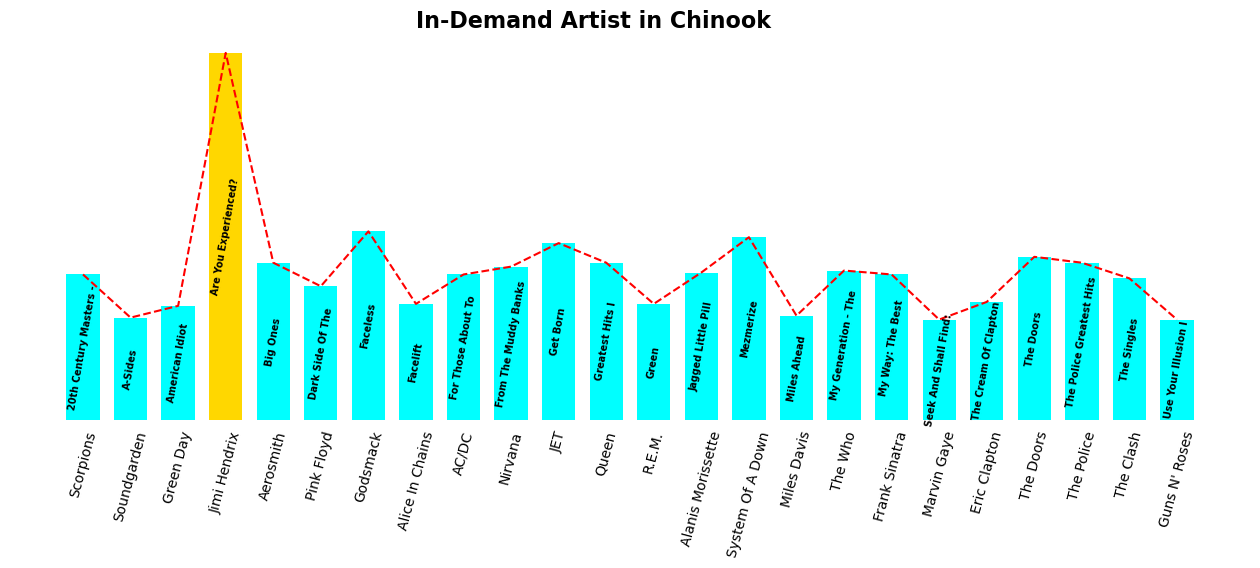

In [17]:
fig , ax = plt.subplots(figsize = (16,5))

# plt.rcParams["figure.figsize"] = (10, 5)

clrs = ['aqua' if (x < max(Alb["No_Sold"]))\
        else 'gold' for x in Alb["No_Sold"] ]
ax.bar(Alb["Artist_Name"], Alb["No_Sold"], color=clrs, width= 0.7)
ax.plot(Alb["Artist_Name"], Alb["No_Sold"], color='Red', ls = '--')

# ax.tick_params(bottom=False, left=True)


#    Removing Labels
ax.set_yticklabels([])
ax.set_xticklabels(Alb['Artist_Name'], rotation=75, fontsize=10)

  
    # Removing Ticks
ax.tick_params(bottom=0, left=0)
  

loc=["left", "right", "top", "bottom"]
for j in loc:
    ax.spines[j].set_visible(False)

ax.text(7, 200, "In-Demand Artist in Chinook", weight='bold', fontsize=16)    


for i in range(len(Alb["Artist_Name"])):
    ax.annotate((Alb["Album_Title"].str.replace(r'(\S+)\s(\S+)\s(\S+)\s(\S+).*', r'\1 \2 \3 \4').iloc[i]),\
                xy=(i, (Alb['No_Sold'].iloc[i]/2)),\
                ha='center', va='center', weight='bold', size=7, rotation=80)

    
    
plt.show()